In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime

import re
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import metrics

from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup                           # Import BeautifulSoup.
import contractions                                     # Import contractions library.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
from sklearn.model_selection import cross_val_score 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading data into pandas dataframe
df = pd.read_csv("../../data/Tweets.csv")

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.shape               # print shape of data.

(14640, 15)

In [5]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [6]:
# Check if any of the columns have unique values
nonunique_cols = [featr for featr in df.columns if len(df[featr].unique()) <2]
nonunique_cols

[]

In [7]:
#Check for missing values
100*df.isna().sum()/len(df)

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

In [8]:
df.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis=1, inplace =True)

In [9]:
100*df.isna().sum()/len(df)

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
name                             0.000000
retweet_count                    0.000000
text                             0.000000
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

In [10]:
df[['negativereason', 'negativereason_confidence', 'tweet_location', 'user_timezone']].head()

,negativereason,negativereason_confidence,tweet_location,user_timezone
0,NaN,NaN,NaN,Eastern Time (US & Canada)
1,NaN,0.0000,NaN,Pacific Time (US & Canada)
2,NaN,NaN,Lets Play,Central Time (US & Canada)
3,Bad Flight,0.7033,NaN,Pacific Time (US & Canada)
4,Can't Tell,1.0000,NaN,Pacific Time (US & Canada)


In [11]:
# Data balance
def createPieChartFor(t_df):
    Lst = 100*t_df.value_counts()/len(t_df)
    
    # set data for pie chart
    labels = t_df.value_counts().index.values
    sizes =  Lst 
    
    # set labels
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

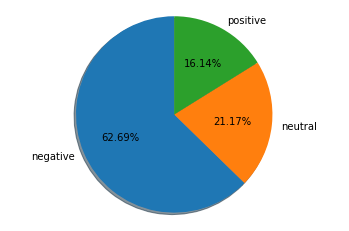

In [12]:
createPieChartFor(df.airline_sentiment)

from above we can see that we have majority of negative comments (63%) followed by neutral (21%) and positive (16%)

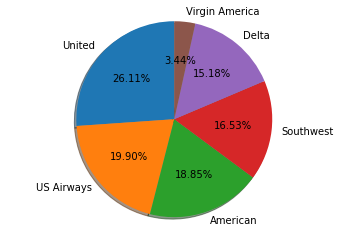

In [13]:
createPieChartFor(df.airline)

Let us :

- now check total tweets for each of the airlines and
- how many of these tweets per airline are negative, positive and neutral

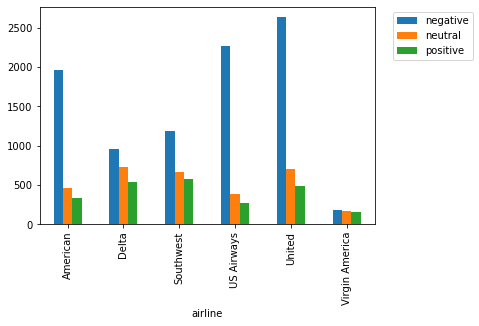

In [14]:
airline_sentiment_df = df.groupby(['airline','airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment_df.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

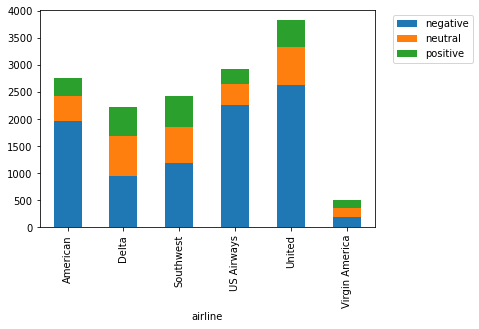

In [15]:
airline_sentiment_df.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

From above graph we can see that

- United, US Airways and American have substatially negative tweets, these also have got over all more tweets
- Virgin America, Delta and Southwest have fairly balanced tweets

Let's convert tweet_created to datetime check if we can get any insights

In [16]:
df.tweet_created= df.tweet_created.apply(pd.to_datetime).dt.date

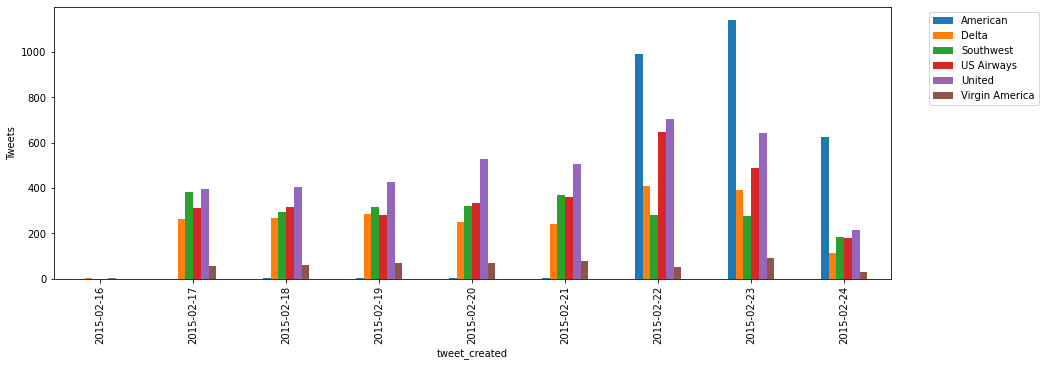

In [17]:
temp_df = df.groupby(['tweet_created','airline']).airline_sentiment.count().unstack()
ax1 = temp_df.plot(kind='bar', figsize = (15,5))
ax1.set_ylabel('Tweets')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

For American we have the tweets coming in from 22-02-2015 onwards

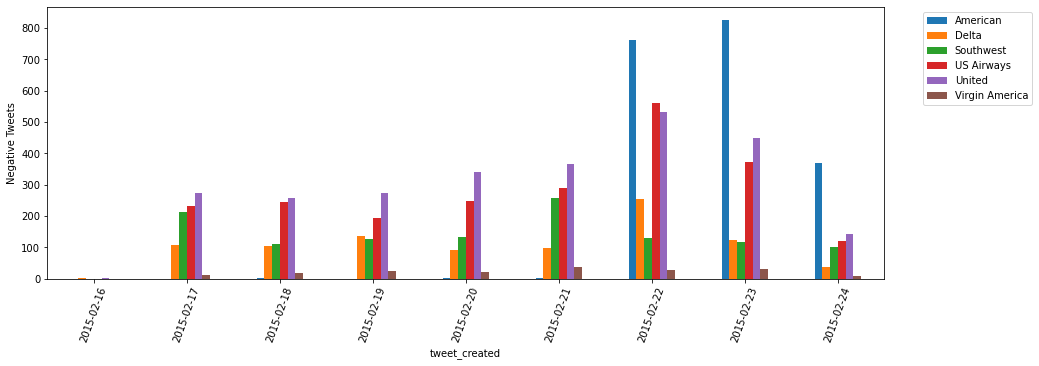

In [18]:
neg_tweet_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()
neg_tweet_df = neg_tweet_df.loc(axis=0)[:,:,'negative']
ax2 = neg_tweet_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind='bar', figsize = (15,5), rot=70)
ax2.set_ylabel('Negative Tweets')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

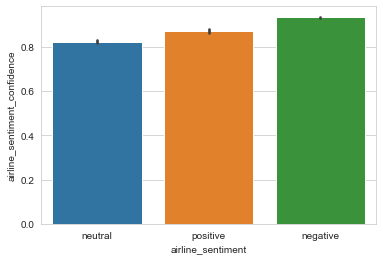

In [19]:
sns.set_style("whitegrid")
ax = sns.barplot(x="airline_sentiment", y="airline_sentiment_confidence", data=df)

In [20]:
df.negativereason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

<AxesSubplot:>

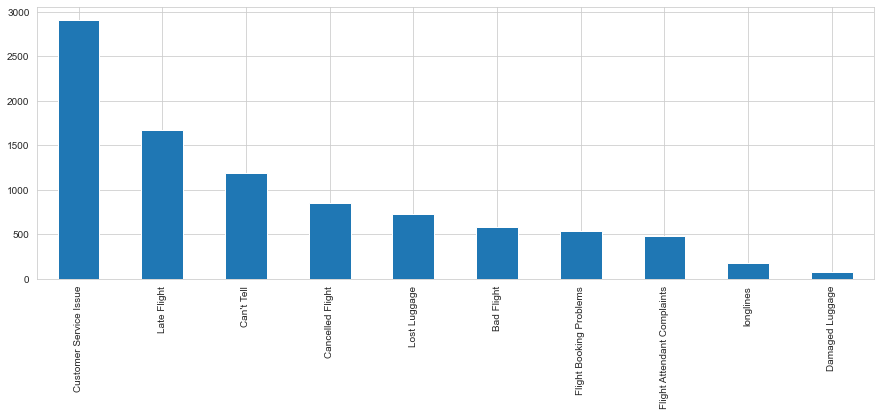

In [21]:
df.negativereason.value_counts().plot(kind='bar', figsize=(15,5))

As we can see majority tweets have said the reason as

- Customer servicec issue
- Late flight

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bad Flight'),
  Text(1, 0, "Can't Tell"),
  Text(2, 0, 'Late Flight'),
  Text(3, 0, 'Customer Service Issue'),
  Text(4, 0, 'Flight Booking Problems'),
  Text(5, 0, 'Lost Luggage'),
  Text(6, 0, 'Flight Attendant Complaints'),
  Text(7, 0, 'Cancelled Flight'),
  Text(8, 0, 'Damaged Luggage'),
  Text(9, 0, 'longlines')])

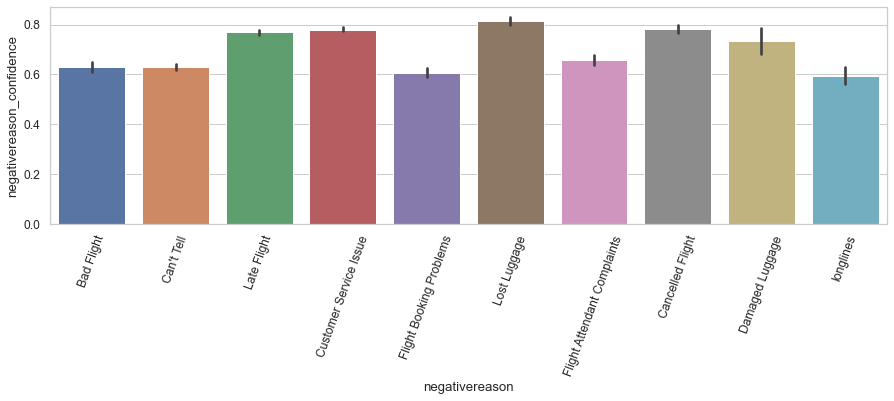

In [22]:
plt.figure(figsize=(15, 4))
sns.set(font_scale = 1.1)
sns.set_style("whitegrid")
ax = sns.barplot(x="negativereason", y="negativereason_confidence", data=df)
plt.xticks(rotation=70)

In [23]:
def createWrdCloudForSentiment(sentiment):
    temp_df = df[df.airline_sentiment==sentiment]
    words = " ".join(temp_df.text)
    cleaned_words = " ".join([w for w in words.split()
                                  if 'http' not in w
                                    and not w.startswith('@')
                                    and w!='RT'])

    wrdcld = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1500,
                      height=1000).generate(cleaned_words)
    plt.figure(figsize=(10,10))
    plt.imshow(wrdcld)
    plt.axis('off')
    plt.show

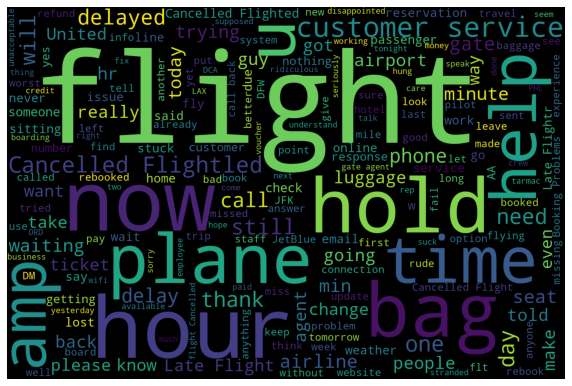

In [24]:
createWrdCloudForSentiment('negative')

we observe that 'flight', 'hour', 'hrlp', 'time' 'hold', 'bag', 'plane' are present more frequently in negative statements.

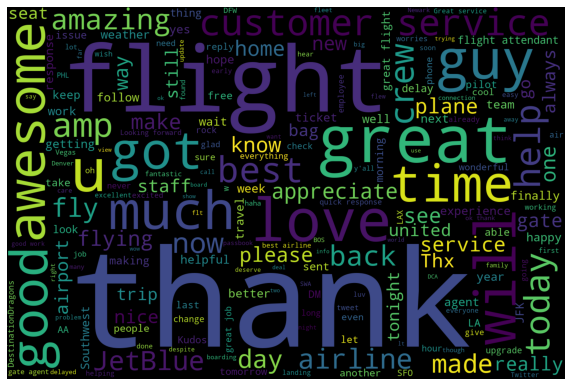

In [25]:
createWrdCloudForSentiment('positive')

we observe that 'thank', 'flight', 'great', 'will', 'awesome' 'love' are present more frequently in positve statements.

we'll do more detailed analysis below

In [26]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline', 'name',
       'retweet_count', 'text', 'tweet_created', 'tweet_location',
       'user_timezone'],
      dtype='object')

Let us start analysing the tweets,
We'll now clean up the text data¶
for this we'll follow the below steps:

Remove all the special characters
convert all letters to lower case
filter out english stop words
stemmer (optional)

In [27]:
df.text

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [28]:
nltk.download('stopwords')
eng_stops = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\japoe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
stopwords = stopwords.words('english')
stopwords = list(set(stopwords)) 
lemmatizer = WordNetLemmatizer()

def process_message(tweet):
    # remove all the special characters
    new_tweet = re.sub("[^a-zA-Z]", " ",tweet) 
    # convert all letters to lower case
    words = new_tweet.lower().split()
    # remove stop words
    words = [w for w in words if not w in eng_stops]        
    # stemming
    #words = [stemmer.stem(word) for word in words]
    # lemmatizer
    words = [lemmatizer.lemmatize(word) for word in words]
    # join all words back to text
    return (" ".join(words))

#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    text = process_message(text)
    return text

In [30]:
df['clean_tweet']=df['text'].apply(lambda x: clean_text(x))

In [31]:
df['clean_tweet_t'] = df.apply(lambda row: nltk.word_tokenize(row['clean_tweet']), axis=1) # Tokenization of data

In [32]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,clean_tweet,clean_tweet_t
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada),virginamerica dhepburn said,"[virginamerica, dhepburn, said]"
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada),virginamerica plus added commercial experience...,"[virginamerica, plus, added, commercial, exper..."
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada),virginamerica today must mean need take anothe...,"[virginamerica, today, must, mean, need, take,..."
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada),virginamerica really aggressive blast obnoxiou...,"[virginamerica, really, aggressive, blast, obn..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada),virginamerica really big bad thing,"[virginamerica, really, big, bad, thing]"


In [33]:
df['clean_tweet'].to_list()

['virginamerica dhepburn said',
 'virginamerica plus added commercial experience tacky',
 'virginamerica today must mean need take another trip',
 'virginamerica really aggressive blast obnoxious entertainment guest face little recourse',
 'virginamerica really big bad thing',
 'virginamerica seriously would pay flight seat playing really bad thing flying va',
 'virginamerica yes nearly every time fly vx ear worm go away',
 'virginamerica really missed prime opportunity men without hat parody http co mwpggrezp',
 'virginamerica well',
 'virginamerica amazing arrived hour early good',
 'virginamerica know suicide second leading death among teen',
 'virginamerica pretty graphic much better minimal iconography',
 'virginamerica great deal already thinking nd trip australia even gone st trip yet p',
 'virginamerica virginmedia flying fabulous seductive sky take stress away travel http co ahlxhhkiyn',
 'virginamerica thanks',
 'virginamerica sfo pdx schedule still mia',
 'virginamerica exci

In [34]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

In [35]:
train_tweets =[]
for tweet in train_df.clean_tweet:
    train_tweets.append(tweet)
    
test_tweets =[]
for tweet in test_df.clean_tweet:
    test_tweets.append(tweet)

## TF-IDF

In [36]:
# bag of words model
vectorizer = TfidfVectorizer()
train_tfidf_model = vectorizer.fit_transform(train_tweets)
test_tfidf_model = vectorizer.transform(test_tweets)

In [37]:
# let's look at the dataframe
train_tfidf = pd.DataFrame(train_tfidf_model.toarray(), columns=vectorizer.get_feature_names())
train_tfidf

,aa,aaaand,aaadvantage,aaalwayslate,aadavantage,aadelay,aadv,aadvantage,aafail,aal,...,zstyuqj,zsuztnaijq,ztkeeup,ztrdwvnl,zurich,zvcfpohl,zvfmxnuelj,zvpttrk,zzkqwwbjz,zznfwkkwp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
print(vectorizer.get_feature_names())

['aa', 'aaaand', 'aaadvantage', 'aaalwayslate', 'aadavantage', 'aadelay', 'aadv', 'aadvantage', 'aafail', 'aal', 'aateam', 'aaumkazy', 'aavvoreph', 'aayavgb', 'aback', 'abandon', 'abandoned', 'abandonment', 'abassinet', 'abbreve', 'abc', 'abcnetwork', 'abcnews', 'abcnewsbayarea', 'abi', 'abigailedge', 'ability', 'able', 'aboard', 'aboout', 'abounds', 'abq', 'abroad', 'absolute', 'absolutely', 'absorb', 'absorber', 'absoulutely', 'absurd', 'absurdly', 'abt', 'abundance', 'abuse', 'abused', 'abysmal', 'ac', 'acc', 'accelerate', 'accept', 'acceptable', 'accepted', 'accepting', 'access', 'accessibility', 'accessible', 'accident', 'accidentally', 'accomidating', 'accommodate', 'accommodated', 'accommodates', 'accommodating', 'accommodation', 'accomplished', 'according', 'accordingly', 'account', 'accountability', 'accountable', 'accrue', 'acct', 'accts', 'accumulation', 'accurate', 'accurately', 'aceboelpa', 'achieve', 'achieves', 'achoxkpjp', 'ack', 'acknowledge', 'acknowledgement', 'ackno

## Now we''ll apply model to predicit sentiments from tweet text data

In [39]:
cls = [LogisticRegression(),
       MultinomialNB(), 
       DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=200),
       KNeighborsClassifier(n_neighbors = 5)]

cls_name = []

In [40]:
lbl_actual = test_df.airline_sentiment
i = 0
accuracy = []
for cl in cls:
    model = cl.fit(train_tfidf_model,train_df.airline_sentiment)
    lbl_pred = model.predict(test_tfidf_model)
    a = (100*accuracy_score(lbl_pred, lbl_actual))
    a = round(a,2)
    accuracy.append(a)
    cls_name.append(cl.__class__.__name__)
    print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
    print ( classification_report(lbl_pred, lbl_actual))
    i +=1

LogisticRegression  Accuracy Score : 79.39%
              precision    recall  f1-score   support

    negative       0.94      0.82      0.87      3219
     neutral       0.49      0.66      0.56       656
    positive       0.61      0.81      0.69       517

    accuracy                           0.79      4392
   macro avg       0.68      0.76      0.71      4392
weighted avg       0.83      0.79      0.81      4392

MultinomialNB  Accuracy Score : 69.97%
              precision    recall  f1-score   support

    negative       0.99      0.69      0.81      4066
     neutral       0.16      0.77      0.27       185
    positive       0.19      0.93      0.31       141

    accuracy                           0.70      4392
   macro avg       0.45      0.80      0.46      4392
weighted avg       0.93      0.70      0.77      4392

DecisionTreeClassifier  Accuracy Score : 67.71%
              precision    recall  f1-score   support

    negative       0.80      0.79      0.79      284

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

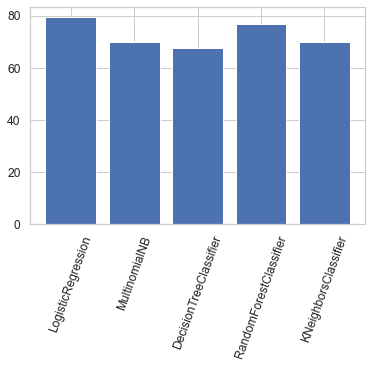

In [41]:
plt.bar(cls_name, accuracy)
plt.xticks(rotation=70)

### Bag of Words (CountVectorizer)

In [42]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

Count_vec = CountVectorizer(max_features=500)                # Keep only 500 features as number of features will increase the processing time.
data_features = Count_vec.fit_transform(df['clean_tweet'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [43]:
data_features.shape       #Shape of the feature vector

(14640, 500)

In [51]:
X = data_features

df.loc[df['airline_sentiment'] == 'positive', 'sent_bin'] = 1
df.loc[df['airline_sentiment'] != 'positive', 'sent_bin'] = 0

y = df.sent_bin

In [52]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [53]:
y_test

10980    0.0
10981    0.0
10982    0.0
10983    0.0
10984    1.0
        ... 
14635    1.0
14636    0.0
14637    0.0
14638    0.0
14639    0.0
Name: sent_bin, Length: 3660, dtype: float64

In [54]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [55]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

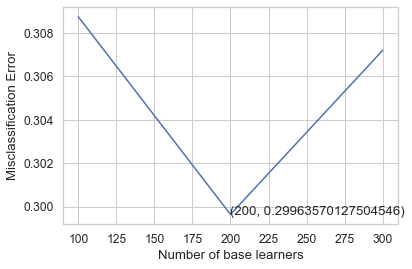

In [56]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [57]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['0' , '1']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3204
           1       0.70      0.58      0.63       456

    accuracy                           0.92      3660
   macro avg       0.82      0.77      0.79      3660
weighted avg       0.91      0.92      0.91      3660

Accuracy of the model is :  0.916120218579235


[[3088  116]
 [ 191  265]]


<AxesSubplot:>

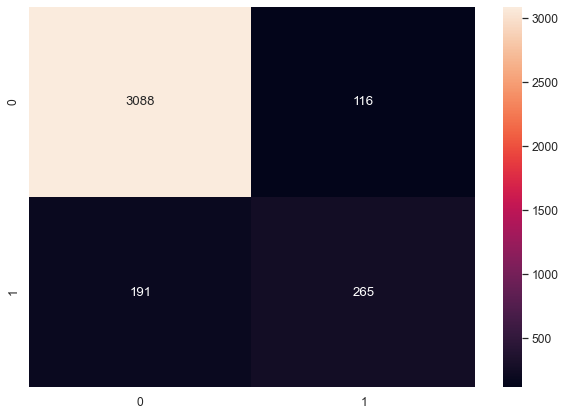

In [58]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1']],
                  columns = [i for i in ['0', '1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

thank,thanks,great,awesome,love,amazing,best,united,flight,jetblue,usairways,southwestair,hour,good,would,get,http,airline,co,appreciate,much,guy,virginamerica,thx,time,service,please,like,customer,help,crew,got,know,fly,one,well,day,go,bag,plane,
 
 


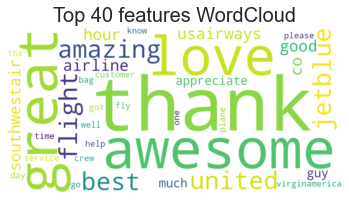

In [59]:
all_features = Count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()